In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Supervised Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC as SVC

from backtesting import Backtest, Strategy

In [63]:
#api key and Ticker
API_KEY = 'ec2d6f3b0cc9395fbce02f1316669229'

In [64]:
#Google
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/1day/GOOGL?type=sma&period=10&apikey={API_KEY}'
googl = pd.read_json(url)

In [65]:
#Apple
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/1day/AAPL?type=sma&period=10&apikey={API_KEY}'
aapl = pd.read_json(url)

In [66]:
#Walmart
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/1day/WMT?type=sma&period=10&apikey={API_KEY}'
wmt = pd.read_json(url)

In [67]:
#Amazon
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/1day/AMZN?type=sma&period=10&apikey={API_KEY}'
amzn = pd.read_json(url)

In [68]:
for x in [googl, aapl, wmt, amzn]:
    x.set_index('date', inplace=True)

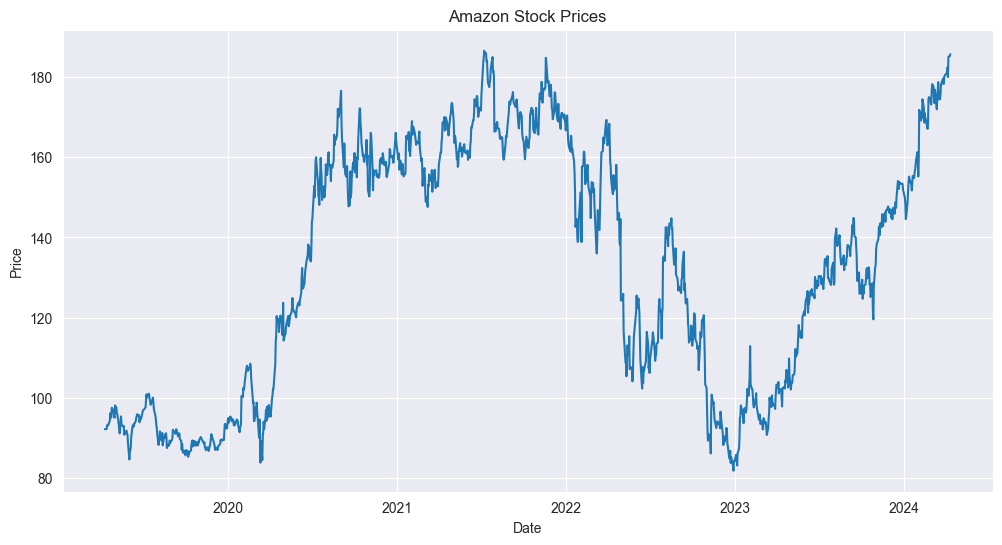

In [69]:
#amazon
plt.figure(figsize=(12,6))
plt.plot(amzn['close'])
plt.title('Amazon Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [70]:
#close min
amzn['close'].min()

81.82

In [71]:
#close max
amzn['close'].max()

186.57

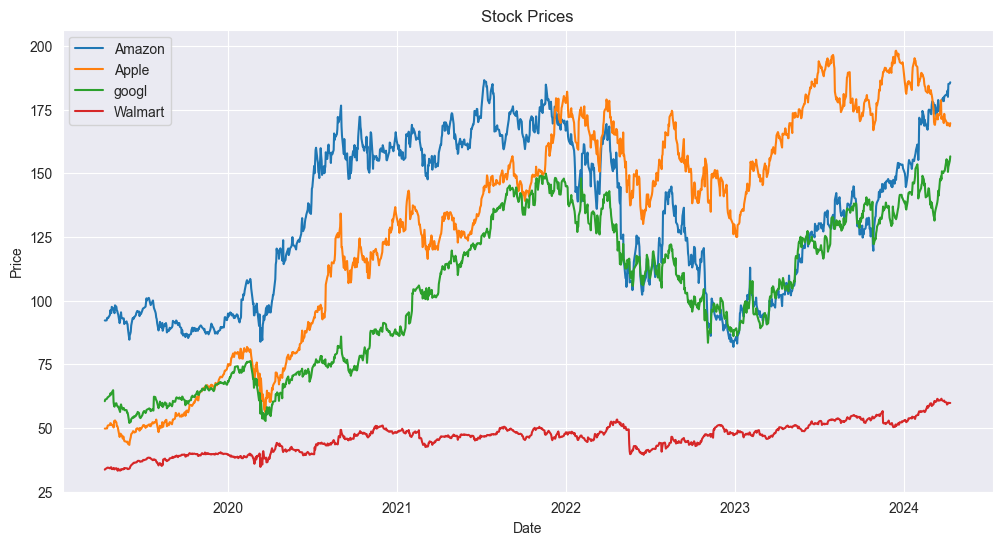

In [72]:
#plotting the data
plt.figure(figsize=(12,6))
plt.plot(amzn['close'], label='Amazon')
plt.plot(aapl['close'], label='Apple')
plt.plot(googl['close'], label='googl')
plt.plot(wmt['close'], label='Walmart')
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [73]:
#concatenating the data
stocks = pd.concat([amzn['close'], aapl['close'], googl['close'], wmt['close']], axis=1)

In [74]:
#renaming the columns
stocks.columns = ['Amazon', 'Apple', 'Google', 'Walmart']

In [75]:
stocks.corr()

,Amazon,Apple,Google,Walmart
Amazon,1.000000,0.528717,0.662060,0.570979
Apple,0.528717,1.000000,0.899182,0.854954
Google,0.662060,0.899182,1.000000,0.778714
Walmart,0.570979,0.854954,0.778714,1.000000


<AxesSubplot: >

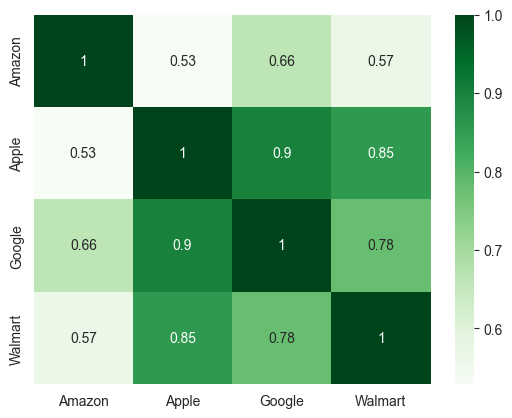

In [76]:
sns.heatmap(stocks.corr(), annot=True, cmap='Greens')

## Supervised Learning Techniques

In [77]:
amzn

,open,high,low,close,volume,sma
date,,,,,,
2024-04-09,187.24,187.34,184.20,185.71,28091851,181.855
2024-04-08,186.90,187.29,184.81,185.19,39221282,181.255
2024-04-05,182.38,186.27,181.97,185.07,42373992,180.623
2024-04-04,184.00,185.10,180.00,180.00,41624261,179.931
2024-04-03,179.90,182.87,179.80,182.41,31046638,179.746
...,...,...,...,...,...,...
2019-04-17,93.65,93.82,93.02,93.24,57870000,92.243
2019-04-16,92.57,93.49,92.40,93.15,60892000,92.023
2019-04-15,92.10,92.34,90.95,92.24,74488000,91.778


In [78]:
#Percentahe change by day
amzn['pct_change'] = amzn['close'].pct_change() #

In [79]:
#change in direction
amzn['direction'] = np.where(amzn['pct_change'] > 0, 'Up', 'Down')

In [80]:
#drop the first row
amzn = amzn.dropna()

In [81]:
amzn['direction'].value_counts()

Down    657
Up      599
Name: direction, dtype: int64

In [82]:
amzn = amzn.rename(columns={'open':'Open', 'high':'High', 'low':'Low', 'close':'Close', 'volume':'Volume'})

In [83]:
amzn

,Open,High,Low,Close,Volume,sma,pct_change,direction
date,,,,,,,,
2024-04-08,186.90,187.29,184.81,185.19,39221282,181.255,-0.002800,Down
2024-04-05,182.38,186.27,181.97,185.07,42373992,180.623,-0.000648,Down
2024-04-04,184.00,185.10,180.00,180.00,41624261,179.931,-0.027395,Down
2024-04-03,179.90,182.87,179.80,182.41,31046638,179.746,0.013389,Up
2024-04-02,179.07,180.79,178.38,180.69,32611546,179.095,-0.009429,Down
...,...,...,...,...,...,...,...,...
2019-04-17,93.65,93.82,93.02,93.24,57870000,92.243,0.001719,Up
2019-04-16,92.57,93.49,92.40,93.15,60892000,92.023,-0.000965,Down
2019-04-15,92.10,92.34,90.95,92.24,74488000,91.778,-0.009769,Down


In [84]:
#splitting the data
x = amzn[['Open','High','Low','Close','Volume']]
y = amzn.direction

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42) #0,25 means 25% of the data is used for testing

In [86]:
#Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Decision Tree Classifier')
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

#Compariosn with the cross validation
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

Decision Tree Classifier
Confusion Matrix:
 [[74 76]
 [81 83]]
Accuracy Score:  0.5


,Actual,Predicted
date,,
2022-07-14,Down,Down
2023-11-09,Down,Down
2024-01-24,Down,Down
2024-01-05,Down,Down
2019-09-10,Down,Up
...,...,...
2023-09-19,Up,Down
2023-02-07,Up,Up
2019-08-28,Down,Down


In [87]:
comparison['Predicted'].value_counts()

Up      159
Down    155
Name: Predicted, dtype: int64

In [88]:
#SVC
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('SVC')
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

#Comparison with the cross validation
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

SVC
Confusion Matrix:
 [[145   5]
 [155   9]]
Accuracy Score:  0.49044585987261147


,Actual,Predicted
date,,
2022-07-14,Down,Down
2023-11-09,Down,Down
2024-01-24,Down,Down
2024-01-05,Down,Down
2019-09-10,Down,Down
...,...,...
2023-09-19,Up,Down
2023-02-07,Up,Down
2019-08-28,Down,Down


In [89]:
comparison['Predicted'].value_counts()

Down    300
Up       14
Name: Predicted, dtype: int64

In [90]:
#Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Logistic Regression')
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

#Comparison with the cross validation
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

Logistic Regression
Confusion Matrix:
 [[150   0]
 [164   0]]
Accuracy Score:  0.47770700636942676


,Actual,Predicted
date,,
2022-07-14,Down,Down
2023-11-09,Down,Down
2024-01-24,Down,Down
2024-01-05,Down,Down
2019-09-10,Down,Down
...,...,...
2023-09-19,Up,Down
2023-02-07,Up,Down
2019-08-28,Down,Down


In [91]:
comparison['Predicted'].value_counts()

Down    314
Name: Predicted, dtype: int64

In [92]:
#Random Forest Classifier
model = RandomForestClassifier(n_estimators=100) #100 trees
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Random Forest Classifier')
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

#Comparison with the cross validation
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

Random Forest Classifier
Confusion Matrix:
 [[86 64]
 [89 75]]
Accuracy Score:  0.5127388535031847


,Actual,Predicted
date,,
2022-07-14,Down,Down
2023-11-09,Down,Up
2024-01-24,Down,Down
2024-01-05,Down,Down
2019-09-10,Down,Up
...,...,...
2023-09-19,Up,Up
2023-02-07,Up,Up
2019-08-28,Down,Down


In [93]:
comparison['Predicted'].value_counts()

Down    175
Up      139
Name: Predicted, dtype: int64

## Predicting the Next 30 Days

In [94]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

In [95]:
amzn

,Open,High,Low,Close,Volume,sma,pct_change,direction
date,,,,,,,,
2024-04-08,186.90,187.29,184.81,185.19,39221282,181.255,-0.002800,Down
2024-04-05,182.38,186.27,181.97,185.07,42373992,180.623,-0.000648,Down
2024-04-04,184.00,185.10,180.00,180.00,41624261,179.931,-0.027395,Down
2024-04-03,179.90,182.87,179.80,182.41,31046638,179.746,0.013389,Up
2024-04-02,179.07,180.79,178.38,180.69,32611546,179.095,-0.009429,Down
...,...,...,...,...,...,...,...,...
2019-04-17,93.65,93.82,93.02,93.24,57870000,92.243,0.001719,Up
2019-04-16,92.57,93.49,92.40,93.15,60892000,92.023,-0.000965,Down
2019-04-15,92.10,92.34,90.95,92.24,74488000,91.778,-0.009769,Down


In [96]:
for i in range(30):
    amzn[f'day{i+2}'] = amzn['direction'].shift(-i)

In [103]:
x = amzn[['Open','High','Low','Close','Volume','sma']]
y = amzn[['direction', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7', 'day8', 'day9', 'day10',
           'day11', 'day12', 'day13', 'day14', 'day15', 'day16', 'day17', 'day18', 'day19', 'day20',
           'day21', 'day22', 'day23', 'day24', 'day25', 'day26', 'day27', 'day28', 'day29', 'day30']]


In [104]:
y = y.replace({'Up': 1, 'Down': 0})

In [105]:
amzn.dropna(inplace=True)

In [106]:
model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100))

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)
model.fit(x_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier())

In [108]:
amzn

,Open,High,Low,Close,Volume,sma,pct_change,direction,day2,day3,...,day22,day23,day24,day25,day26,day27,day28,day29,day30,day31
date,,,,,,,,,,,,,,,,,,,,,
2024-04-08,186.90,187.29,184.81,185.19,39221282,181.255,-0.002800,Down,Down,Down,...,Up,Up,Down,Up,Up,Up,Down,Down,Up,Up
2024-04-05,182.38,186.27,181.97,185.07,42373992,180.623,-0.000648,Down,Down,Down,...,Up,Down,Up,Up,Up,Down,Down,Up,Up,Up
2024-04-04,184.00,185.10,180.00,180.00,41624261,179.931,-0.027395,Down,Down,Up,...,Down,Up,Up,Up,Down,Down,Up,Up,Up,Down
2024-04-03,179.90,182.87,179.80,182.41,31046638,179.746,0.013389,Up,Up,Down,...,Up,Up,Up,Down,Down,Up,Up,Up,Down,Down
2024-04-02,179.07,180.79,178.38,180.69,32611546,179.095,-0.009429,Down,Down,Up,...,Up,Up,Down,Down,Up,Up,Up,Down,Down,Down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-30,91.27,91.47,90.39,90.82,62938000,92.317,0.023324,Up,Up,Up,...,Up,Up,Up,Up,Down,Down,Up,Down,Down,Up
2019-05-29,91.16,91.50,90.38,90.96,85580000,92.591,0.001542,Up,Up,Up,...,Up,Up,Up,Down,Down,Up,Down,Down,Up,Down
2019-05-28,91.64,92.46,91.37,91.82,64000000,92.696,0.009455,Up,Up,Down,...,Up,Up,Down,Down,Up,Down,Down,Up,Down,Down


In [109]:
y_pred = model.predict(x_test)
print('Random Forest Classifier')
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Random Forest Classifier
Accuracy Score:  0.0


In [122]:
for i, col in enumerate(y):
    print(f"\nTarget Column: {col}")
    print("Actual Values:")
    print(y_test[col])
    print("Predicted Values:")
    print(y_pred[:, i])  # Use the enumerated index instead of target_cols.index(col)
    print(f"Accuracy Score: {accuracy_score(y_test[col], y_pred[:, i])}")

# Calculate the average accuracy score
avg_accuracy = sum(accuracy_score(y_test[col], y_pred[:, i]) for i, col in enumerate(y)) / len(y)
print(f"\nAverage Accuracy Score: {avg_accuracy}")


Target Column: direction
Actual Values:
date
2020-02-10    0
2023-02-10    0
2020-01-09    1
2023-02-09    1
2023-11-09    0
             ..
2022-04-20    1
2021-10-20    0
2022-06-06    1
2020-10-27    1
2020-05-22    1
Name: direction, Length: 307, dtype: int64
Predicted Values:
[0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1
 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1
 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0
 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0
 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 1 1 0 1 0 0 1]
Accuracy Score: 0.4788273615635179

Target Column: day2
Actual Values:
date
2020-02-10    0
2

In [111]:
amzn

,Open,High,Low,Close,Volume,sma,pct_change,direction,day2,day3,...,day22,day23,day24,day25,day26,day27,day28,day29,day30,day31
date,,,,,,,,,,,,,,,,,,,,,
2024-04-08,186.90,187.29,184.81,185.19,39221282,181.255,-0.002800,Down,Down,Down,...,Up,Up,Down,Up,Up,Up,Down,Down,Up,Up
2024-04-05,182.38,186.27,181.97,185.07,42373992,180.623,-0.000648,Down,Down,Down,...,Up,Down,Up,Up,Up,Down,Down,Up,Up,Up
2024-04-04,184.00,185.10,180.00,180.00,41624261,179.931,-0.027395,Down,Down,Up,...,Down,Up,Up,Up,Down,Down,Up,Up,Up,Down
2024-04-03,179.90,182.87,179.80,182.41,31046638,179.746,0.013389,Up,Up,Down,...,Up,Up,Up,Down,Down,Up,Up,Up,Down,Down
2024-04-02,179.07,180.79,178.38,180.69,32611546,179.095,-0.009429,Down,Down,Up,...,Up,Up,Down,Down,Up,Up,Up,Down,Down,Down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-30,91.27,91.47,90.39,90.82,62938000,92.317,0.023324,Up,Up,Up,...,Up,Up,Up,Up,Down,Down,Up,Down,Down,Up
2019-05-29,91.16,91.50,90.38,90.96,85580000,92.591,0.001542,Up,Up,Up,...,Up,Up,Up,Down,Down,Up,Down,Down,Up,Down
2019-05-28,91.64,92.46,91.37,91.82,64000000,92.696,0.009455,Up,Up,Down,...,Up,Up,Down,Down,Up,Down,Down,Up,Down,Down


In [117]:
day_3 = amzn['direction'] == amzn['day3']

In [118]:
day_3.sum()

620

In [119]:
len(day_3)

1227

In [120]:
score_day2 = day_3.sum() / len(day_2)

In [121]:
score_day2

0.5052974735126324